## Chapter 6: Audio analysis

### 6.1 Analysis toolkit

#### 6.1.1 Zero-crossing rate

In [1]:
# 교재 본문에 없는 임의로 생성한 코드
# 예시 신호 세그먼트
import numpy as np

segment = np.array([0.5, -0.3, 0.1, -0.2, 0.4, -0.5])  # 예시 세그먼트

In [2]:
def zcr(segment):
    zc = 0
    # 제로 크로싱 계산
    for m in range(len(segment) - 1):
        if segment[m] * segment[m + 1] <= 0:
            zc += 1
    
    # 제로 크로싱 비율 계산
    zcr = zc / len(segment)
    
    return zcr

# 함수 호출
zcr_value = zcr(segment)
print(f"Zero Crossing Rate (ZCR): {zcr_value}")

Zero Crossing Rate (ZCR): 0.8333333333333334


#### 6.1.2 Frame power

In [3]:
def fpow(segment):
    # 프레임 전력 계산
    fpow = np.sum(segment ** 2) / len(segment)
    
    return fpow

# 함수 호출
fpow_value = fpow(segment)
print(f"Frame Power (fpow): {fpow_value}")

Frame Power (fpow): 0.13333333333333333


#### 6.1.3 Average3 magnitude difference function

In [4]:
def amdf(segment):
    # AMDF 계산
    amdf = np.sum(np.abs(segment)) / len(segment)
    
    return amdf

# 함수 호출
amdf_value = amdf(segment)
print(f"AMDF: {amdf_value}")

AMDF: 0.3333333333333333


#### 6.1.4 Spectral measures

In [5]:
# 교재 본문에 없는 임의로 생성한 코드
# 예시 신호
speech_letter_c = np.random.randn(1024)  # 예시로 1024개의 랜덤 신호
speech_letter_r = np.random.randn(1024)  # 예시로 1024개의 랜덤 신호

In [6]:
# 신호 길이 계산
Nc = len(speech_letter_c)
Nr = len(speech_letter_r)

# FFT 계산 및 절대값의 첫 번째 절반 구하기 (speech_letter_c)
fft_c = np.fft.fft(speech_letter_c)
fft_c = np.abs(fft_c[:Nc//2])

# FFT 계산 및 절대값의 첫 번째 절반 구하기 (speech_letter_r)
fft_r = np.fft.fft(speech_letter_r)
fft_r = np.abs(fft_r[:Nr//2])

# 결과 출력 (첫 10개의 샘플 확인)
print("FFT of speech_letter_c (first 10 values):", fft_c[:10])
print("FFT of speech_letter_r (first 10 values):", fft_r[:10])

FFT of speech_letter_c (first 10 values): [22.57960003 20.36433147 27.0536809  29.38998629 28.61752686  3.26588212
 17.05264908  7.61425138 13.10229412 28.96861716]
FFT of speech_letter_r (first 10 values): [ 8.8664027  33.52345358  5.40825374 18.90975296 18.16970107 21.80121178
 24.59915663 26.89653528 52.63129269 28.70602287]


In [7]:
# 저주파수와 고주파수 대역에서의 평균 계산 (speech_letter_c)
c_lowf = np.sum(fft_c[:Nc//4]) / (Nc//4)
c_highf = np.sum(fft_c[Nc//4:Nc//2]) / (Nc//4)

# 저주파수와 고주파수 대역에서의 평균 계산 (speech_letter_r)
r_lowf = np.sum(fft_r[:Nr//4]) / (Nr//4)
r_highf = np.sum(fft_r[Nr//4:Nr//2]) / (Nr//4)

In [8]:
# 고주파수와 저주파수 비율 계산
c_ratio = c_highf / c_lowf
r_ratio = r_highf / r_lowf

# 결과 출력
print(f"c_ratio: {c_ratio}")
print(f"r_ratio: {r_ratio}")

c_ratio: 0.9853957883512846
r_ratio: 1.0297210587276842


#### 6.1.5 Cepstral analysis

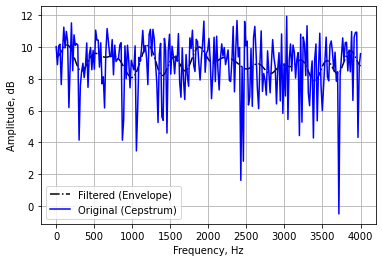

In [9]:
import matplotlib.pyplot as plt

# 예시 신호 세그먼트
segment = np.random.randn(480)  # 1024개의 랜덤 샘플로 신호 생성

# 신호 길이
len_segment = len(segment)

# FFT 및 로그를 사용한 켑스트럼 계산
ps = np.log(np.abs(np.fft.fft(segment)))
cep = np.fft.ifft(ps)

# 필터링 수행
cut = 30
cep2 = np.zeros(len_segment, dtype=complex)
cep2[:cut-1] = cep[:cut-1] * 2
cep2[0] = cep[0]
cep2[cut-1] = cep[cut-1]

# 주파수 도메인으로 변환
env = np.real(np.fft.fft(cep2))
act = np.real(np.fft.fft(cep))

# 결과를 플롯
fs = 8000  # 교재 본문에 없는 샘플링 속도 예시
pl1 = 20 * np.log10(np.abs(env[:len_segment // 2]))
pl2 = 20 * np.log10(np.abs(act[:len_segment // 2]))
span = np.linspace(1, fs / 2, len_segment // 2)

plt.plot(span, pl1, 'k-.', label='Filtered (Envelope)')
plt.plot(span, pl2, 'b', label='Original (Cepstrum)')
plt.xlabel('Frequency, Hz')
plt.ylabel('Amplitude, dB')
plt.legend()
plt.grid(True)
plt.show()

#### 6.1.6 LSP-based measures

##### 6.1.6.1 Instantaneous LSP analysis

In [10]:
def lsp_shift(w1, w2):
    # 두 배열의 합의 차이 계산
    shift = np.sum(w1) - np.sum(w2)
    return shift

# 예시 배열
w1 = np.array([1, 2, 3])
w2 = np.array([4, 5, 6])

# 함수 호출
shift_value = lsp_shift(w1, w2)
print(f"Shift: {shift_value}")

Shift: -9


In [11]:
def lsp_bias(w):
    # 배열의 평균 계산
    bias = np.sum(w) / len(w)
    return bias

# 예시 배열
w = np.array([1, 2, 3, 4, 5])

# 함수 호출
bias_value = lsp_bias(w)
print(f"Bias: {bias_value}")

Bias: 3.0


In [12]:
def lsp_dev(w, bar_w, b):
    # 배열의 편차 계산
    dev = np.sum((w - bar_w) ** b)
    return dev

# 예시 배열과 값들
w = np.array([1, 2, 3, 4, 5])
bar_w = np.mean(w)  # 배열의 평균값
b = 2  # 제곱 예시

# 함수 호출
dev_value = lsp_dev(w, bar_w, b)
print(f"Deviation: {dev_value}")

Deviation: 10.0


In [13]:
# 배열 생성 및 π/11 곱하기
bar_w = np.arange(1, 11) * (np.pi / 11)

# 출력 확인
print(bar_w)

[0.28559933 0.57119866 0.856798   1.14239733 1.42799666 1.71359599
 1.99919533 2.28479466 2.57039399 2.85599332]


### 6.3 Analysis of other signals

#### 6.3.1 Analysis of music

In [14]:
# 기존에 설계한 lpc, lpc_lsp, lpcsp 함수 재호출 코드

import scipy.signal as signal
from scipy.linalg import toeplitz
from scipy.signal import freqz

def lpc(signal, order):
    # 오토 상관 함수 계산
    autocorr = np.correlate(signal, signal, mode='full')
    autocorr = autocorr[len(autocorr) // 2:]  # 양의 지연만 사용
    
    # Toeplitz 행렬 생성
    R = toeplitz(autocorr[:order])
    r = autocorr[1:order + 1]
    
    # LPC 계수 계산 (Yule-Walker 방정식)
    lpc_coeffs = np.linalg.solve(R, r)
    
    # LPC 계수 반환 (1을 추가해 전체 계수로 반환)
    return np.concatenate(([1], -lpc_coeffs))

def lpc_lsp(a):
    p = len(a)
    A = [1]
    B = [1]

    # A와 B의 값 계산
    for k in range(1, p):
        A.append((a[k] - a[p - k]) + A[k - 1])
        B.append((a[k] + a[p - k]) - B[k - 1])

    # 다항식의 근 계산
    r1 = np.roots(A)
    r2 = np.roots(B)

    theta1 = []
    theta2 = []

    # theta1과 theta2 계산
    for k in range(p - 1):
        if np.real(r1[k]) < 0:
            theta1.append(np.pi - abs(np.arctan2(np.imag(r1[k]), np.real(r1[k]))))
        else:
            theta1.append(abs(np.arctan2(np.imag(r1[k]), np.real(r1[k]))))
        
        if np.real(r2[k]) < 0:
            theta2.append(np.pi - abs(np.arctan2(np.imag(r2[k]), np.real(r2[k]))))
        else:
            theta2.append(abs(np.arctan2(np.imag(r2[k]), np.real(r2[k]))))

    # theta 계산
    p -= 1
    theta = [0] * p
    for k in range(int(p / 2)):
        theta[k] = theta1[k * 2]
        theta[k + int(p / 2)] = theta2[k * 2]

    # 정렬하여 lsp 반환
    lsp = np.sort(theta)
    
    return lsp

def lpcsp(a, lsp):
    # 주파수 응답 계산
    HH, FF = freqz([1], a, 100)
    
    # 주파수 응답을 로그 스케일로 플로팅
    plt.semilogy(np.abs(HH), 'm-')
    
    # 현재 축을 저장
    V = plt.axis()
    
    # 축 설정
    plt.axis([1, len(FF), V[2], V[3]])
    
    # lsp 위치에 선을 추가
    lsc = 100 / np.pi
    for lp in range(len(lsp)):
        plt.axvline(x=1 + lsp[lp] * lsc, color='k', linestyle='--')
    
    # 플롯 보여주기
    plt.show()

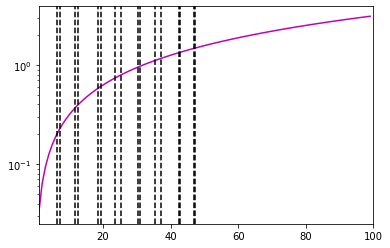

In [15]:
# 파라미터 설정
P = 16  # LPC 차수
Ws = 256  # 윈도우 크기
violin = np.random.randn(Ws)  # 예시로 랜덤 신호 생성

# 신호 세그먼트에 해밍 창 적용
vseg = violin[:Ws] * np.hamming(Ws)

# LPC 계수 계산
a = lpc(vseg, P)

# LPC 계수를 LSP로 변환
w = lpc_lsp(a)

# LPC 주파수 응답 시각화
lpcsp(a, w)